ИУ5-62Б Ванина Полина. Вариант 5

Задание

Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

Набор данных

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

Методы

1) метод опорных векторов

2) случайный лес

Решение

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv('heart.csv', sep=',')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
# Ищем пропуски.
(data.isnull() | data.empty | data.isna()).sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Выбор метрик и подготовка данных

Так как выполняется задача небинарной классификации и в тестовой выборке возможен дисбаланс классов, были выбраны следующие метрики:

precision;
recall;
f1-score.

Всем метрикам был задан уровень детализации average='weighted'.

In [6]:
def print_metrics(y_test, y_pred):
    rep = classification_report(y_test, y_pred, output_dict=True)
    print("weighted precision:", rep['weighted avg']['precision'])
    print("weighted recall:", rep['weighted avg']['recall'])
    print("weighted f1-score:", rep['weighted avg']['f1-score'])
    plt.figure(figsize=(4, 3))
    plt.title('Матрица ошибок')
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues");

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['sex'], axis=1), data['sex'], test_size=0.5, random_state=17)

Масштабирование данных

In [11]:
scaler = StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_train.columns)
x_train_scaled.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,-3.382711e-17,-5.854692e-17,8.050201e-18,-4.228388e-18,1.366095e-17,-3.035766e-18,4.499439e-18,4.336809e-19,-2.168404e-17,-4.510281e-17,-5.637851e-18,-2.409097e-16,3.903128e-18
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-2.898265e+00,-9.179093e-01,-2.131299e+00,-2.521117e+00,-4.335147e-01,-9.428090e-01,-3.292789e+00,-7.300234e-01,-9.382436e-01,-2.314979e+00,-7.427814e-01,-3.667597e+00,-9.922178e-01
25%,-6.444501e-01,-9.179093e-01,-6.755110e-01,-6.940839e-01,-4.335147e-01,-9.428090e-01,-7.108060e-01,-7.300234e-01,-9.382436e-01,-6.432312e-01,-7.427814e-01,-4.713253e-01,-9.922178e-01
50%,1.443850e-01,4.712060e-02,-1.155925e-01,-8.507286e-02,-4.335147e-01,-9.428090e-01,1.357459e-01,-7.300234e-01,-2.439264e-01,-6.432312e-01,-7.427814e-01,-4.713253e-01,-9.922178e-01
75%,7.078386e-01,1.012151e+00,4.443259e-01,6.280427e-01,-4.335147e-01,9.428090e-01,7.283322e-01,1.369819e+00,6.239702e-01,1.028517e+00,2.475938e-01,1.126811e+00,1.007843e+00
max,2.510890e+00,1.977180e+00,3.803837e+00,6.598433e+00,2.306727e+00,2.828427e+00,2.252126e+00,1.369819e+00,3.921977e+00,1.028517e+00,3.218719e+00,1.126811e+00,1.007843e+00


SVC
Базовая модель
Без масштабирования:

weighted precision: 0.796714007240323
weighted recall: 0.7153996101364523
weighted f1-score: 0.6006107862248212


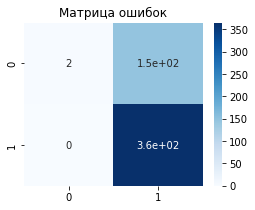

In [12]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)
print_metrics(y_test, y_pred_svm)

С масштабированием:

weighted precision: 0.8542794557987179
weighted recall: 0.8576998050682261
weighted f1-score: 0.8538787178613837


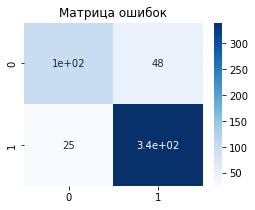

In [13]:
svm_model = SVC()
svm_model.fit(x_train_scaled, y_train)
y_pred_svm = svm_model.predict(x_test_scaled)
print_metrics(y_test, y_pred_svm)

Подбор гиперпараметров

In [14]:
params = {'C': np.concatenate([np.arange(0.1, 2, 0.03), np.arange(2, 20, 1)])}
grid_cv = GridSearchCV(estimator=svm_model, param_grid=params, cv=10, n_jobs=-1, scoring='f1_macro')
grid_cv.fit(x_train_scaled, y_train)
print(grid_cv.best_params_)

{'C': 19.0}


Лучшая модель

weighted precision: 0.9256577319359597
weighted recall: 0.9259259259259259
weighted f1-score: 0.925775167383286


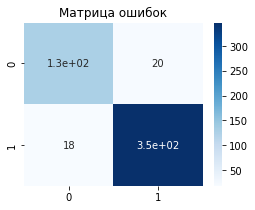

In [15]:
best_svm_model = grid_cv.best_estimator_
best_svm_model.fit(x_train_scaled, y_train)
y_pred_svm = best_svm_model.predict(x_test_scaled)
print_metrics(y_test, y_pred_svm)

RandomForestClassifier
Базовая модель

weighted precision: 0.9355508860624107
weighted recall: 0.935672514619883
weighted f1-score: 0.9356074846316482


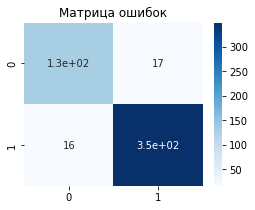

In [16]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
y_pred_rfc = rfc_model.predict(x_test)
print_metrics(y_test, y_pred_rfc)

Подбор гиперпараметров

In [17]:
params = {'n_estimators': [5, 10, 50, 100], 'max_features': [2, 3, 4], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3, 4, 5]}
grid_cv = GridSearchCV(estimator=rfc_model, param_grid=params, cv=10, n_jobs=-1, scoring='f1_weighted')
grid_cv.fit(x_train, y_train)
print(grid_cv.best_params_)

{'criterion': 'entropy', 'max_features': 3, 'min_samples_leaf': 1, 'n_estimators': 100}


Лучшая модель

weighted precision: 0.9569023809146474
weighted recall: 0.9571150097465887
weighted f1-score: 0.9569381297711118


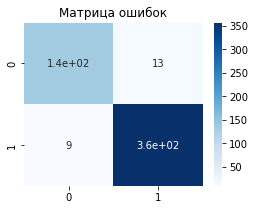

In [18]:
best_rfc_model = grid_cv.best_estimator_
best_rfc_model.fit(x_train, y_train)
y_pred_rfc = best_rfc_model.predict(x_test)
print_metrics(y_test, y_pred_rfc)

Сравнение результатов

SVC result

weighted precision: 0.9256577319359597
weighted recall: 0.9259259259259259
weighted f1-score: 0.925775167383286


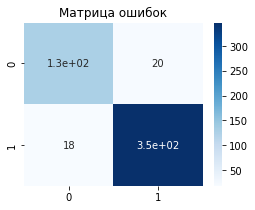

In [19]:
print("SVC result\n")
print_metrics(y_test, y_pred_svm)

RandomForestClassifier result

weighted precision: 0.9569023809146474
weighted recall: 0.9571150097465887
weighted f1-score: 0.9569381297711118


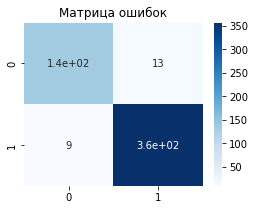

In [20]:
print("RandomForestClassifier result\n")
print_metrics(y_test, y_pred_rfc)